In [14]:
#load libraries 
import numpy as np
import scipy.sparse as sp
import cplex as cp

In [40]:
def mixed_integer_linear_programming(direction, A, senses, b, c, l, u, types):
    # create an empty optimization problem
    prob = cp.Cplex()

    # add decision variables to the problem including their coefficients in objective and ranges
    prob.variables.add(obj = c.tolist(), lb = l.tolist(), ub = u.tolist(), types = types.tolist())

    # define problem type
    if direction == "maximize":
        prob.objective.set_sense(prob.objective.sense.maximize)
    else:
        prob.objective.set_sense(prob.objective.sense.minimize)

    # add constraints to the problem including their directions and right-hand side values
    prob.linear_constraints.add(senses = senses.tolist(), rhs = b.tolist())

    # add coefficients for each constraint
    row_indices, col_indices = A.nonzero()
    prob.linear_constraints.set_coefficients(zip(row_indices.tolist(), col_indices.tolist(), A.data.tolist()))

    # solve the problem
    prob.solve()
    print(prob.write_as_string())

    # check the solution status
    print(prob.solution.get_status())
    print(prob.solution.status[prob.solution.get_status()])

    # get the solution
    x_star = prob.solution.get_values()
    obj_star = prob.solution.get_objective_value()

    return(x_star, obj_star)

In [62]:
def multiple_knapsack_problem(weights_file, values_file, capacity_file):
    weights = np.loadtxt(weights_file)
    values = np.loadtxt(values_file)
    capacity = np.loadtxt(capacity_file)
    
    M = capacity.size
    N = weights.size
    C = capacity

    c = np.concatenate((values, values))
    senses = np.repeat("L", M + N)
    b = np.concatenate((np.array(capacity), np.repeat(1, N)))
    l = np.repeat(0, N * M)
    u = np.repeat(1, N * M)
    types = np.repeat("B", N * M)
    
    aij = np.concatenate((weights, weights, np.repeat(1, N * M)))
    row = np.concatenate((np.repeat(range(M), N), M + np.repeat(range(N), M)))
    col = np.concatenate((range(M * N), np.reshape(np.array(range(M * N)).reshape((M, N)), newshape = (M*N, ), order = "F")))
    A = sp.csr_matrix((aij, (row, col)), shape = (N+M, N*M))
    
    import matplotlib.pyplot as plt
    plt.figure(figsize = (6, 9))
    plt.spy(A, marker = "o")
    plt.show()

    x_star, obj_star = mixed_integer_linear_programming("maximize", A, senses,b, c, l, u, types)
    return(x_star, obj_star)


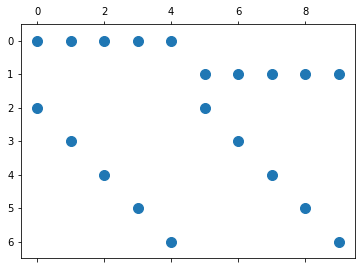

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 0.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 1 rows and 1 columns.
MIP Presolve modified 3 coefficients.
Reduced MIP has 6 rows, 9 columns, and 17 nonzeros.
Reduced MIP has 9 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (0.02 ticks)
Probing time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 6 rows, 9 columns, and 17 nonzeros.
Reduced MIP has 9 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.03 sec. (0.01 ticks)
Probing time = 0.00 sec. (0.00 ticks)
Clique table members: 9.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 2 threads.
Root relaxation solution time = 0.03 sec. (0.01 ticks)

        Nodes                                         Cuts/
   Nod

Default variable names x1, x2 ... being created.
Default row names c1, c2 ... being created.


\ENCODING=ISO-8859-1
\Problem name: 

Maximize
 obj1: 50 x1 + 40 x2 + 30 x3 + 20 x4 + 10 x5 + 50 x6 + 40 x7 + 30 x8 + 20 x9
       + 10 x10
Subject To
 c1: 10 x1 + 20 x2 + 30 x3 + 40 x4 + 50 x5 <= 40
 c2: 10 x6 + 20 x7 + 30 x8 + 40 x9 + 50 x10 <= 50
 c3: x1 + x6 <= 1
 c4: x2 + x7 <= 1
 c5: x3 + x8 <= 1
 c6: x4 + x9 <= 1
 c7: x5 + x10 <= 1
Bounds
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1
 0 <= x4 <= 1
 0 <= x5 <= 1
 0 <= x6 <= 1
 0 <= x7 <= 1
 0 <= x8 <= 1
 0 <= x9 <= 1
 0 <= x10 <= 1
Binaries
 x1  x2  x3  x4  x5  x6  x7  x8  x9  x10 
End

101
MIP_optimal
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
120.0


In [63]:
x_star, obj_star = multiple_knapsack_problem("weights.txt", "values.txt", "capacities.txt")
print(x_star)
print(obj_star)